<a href="https://colab.research.google.com/github/AayushSingh94/water-quality-and-portability-prediction/blob/main/water_quality_and_portability_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Text(0, 0.5, 'percentage of missing values')

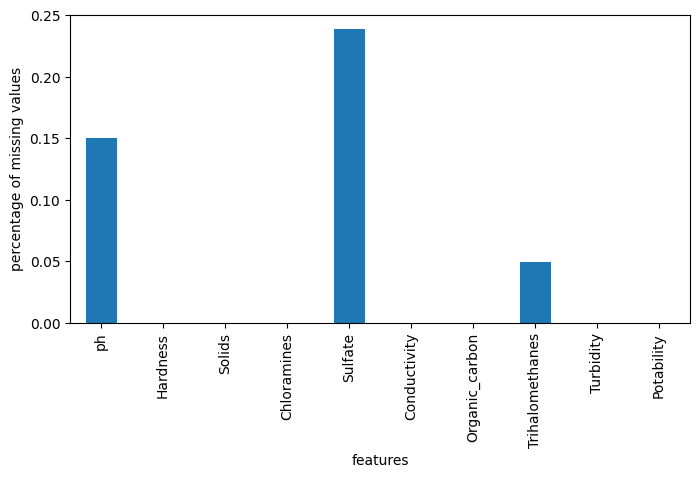

In [ ]:
df.isnull().mean().plot.bar(figsize=(8,4))
plt.xlabel("features")
plt.ylabel("percentage of missing values")


In [ ]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Equalizing portability**

In [ ]:
zero  = df[df['Potability']==0]   #zero values in Potability column
one = df[df['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1998)
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [ ]:
df.Potability.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

**Data Visulization**

<Axes: >

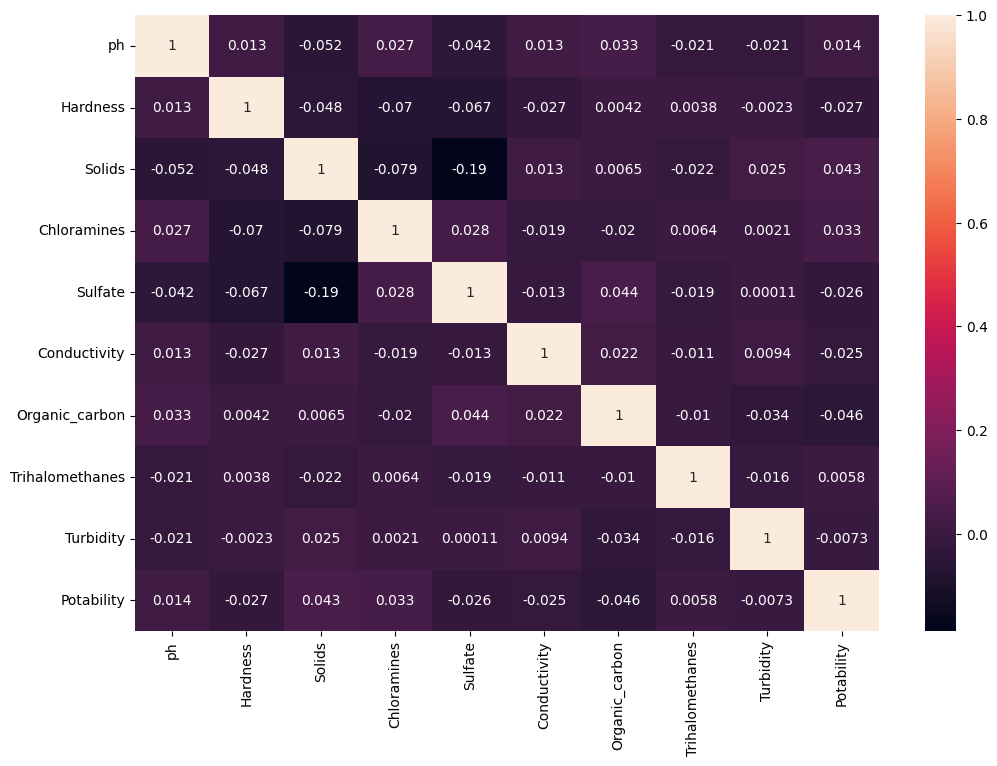

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
501,5.842933,168.295287,19156.123132,6.878348,331.477649,506.756808,14.526151,80.423715,4.143225,0
2449,4.439096,190.153449,20864.340465,2.386653,333.775777,515.631205,18.081003,63.363082,3.844231,1
2930,9.764658,119.164010,38781.457422,9.334632,380.230634,512.331846,14.967733,59.193176,3.024571,0
1384,6.983133,181.119529,17503.312230,6.931628,333.775777,181.483754,11.598340,72.033901,4.426983,0
2403,4.865070,174.060457,15222.246444,5.839219,412.037120,333.504327,15.266615,68.926353,3.974972,1


In [ ]:
#Seprating the data and lable(portability)
x=df.drop('Potability',axis=1)
y=df['Potability']
x.shape,y.shape

((3996, 9), (3996,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
x_train.shape,x_test.shape

((3196, 9), (800, 9))

In [ ]:
#Data preparation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.87591498, -0.81987308, -0.33876152, ...,  0.09536915,
         0.88580739,  0.23377857],
       [-1.85070323, -0.16859751, -0.14581518, ...,  1.18006544,
        -0.191848  , -0.14779888],
       [ 1.84722927, -2.28376564,  1.87795662, ...,  0.2301096 ,
        -0.45524513, -1.1938514 ],
       ...,
       [-1.03861373,  2.26655473,  2.43128128, ...,  0.68018428,
        -0.32533843, -0.23295037],
       [-0.01637609, -0.78256539, -0.24290938, ..., -0.87910807,
        -1.55998476, -0.09959258],
       [ 1.42713457, -0.01157901, -0.61851934, ..., -2.75133244,
        -0.69062878,  1.90450443]])

**logistic** **Regression**

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating object of lr
model_lr=LogisticRegression()

#training of the model
model_lr.fit(x_train,y_train)
#making prediction
pred_lr=model_lr.predict(x_test)
#finding accuracy
accuracy_score_lr=accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.5025

**Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating object of dt
model_dt=DecisionTreeClassifier(max_depth=8)

#training of the model
model_dt.fit(x_train,y_train)
#making prediction
pred_dt=model_dt.predict(x_test)
#finding accuracy
accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.6225

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#creating object of rf
model_rf=RandomForestClassifier()

#training of the model
model_rf.fit(x_train,y_train)
#making prediction
pred_rf=model_rf.predict(x_test)
#finding accuracy
accuracy_score_rf=accuracy_score(y_test,pred_rf)
accuracy_score_rf

0.81875

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#creating object of knn
max=0
for i in range(4,22):
  model_knn=KNeighborsClassifier(n_neighbors=i)
  #training of the model
  model_knn.fit(x_train,y_train)
  #making prediction
  pred_knn=model_knn.predict(x_test)
  #finding accuracy
  accuracy_score_knn=accuracy_score(y_test,pred_knn)
  if accuracy_score_knn>max:
    max=accuracy_score_knn
print(max)

0.5975


**SVM**

In [ ]:
from sklearn.svm import SVC
#creating object of rf
model_svm=SVC(kernel="rbf")

#training of the model
model_svm.fit(x_train,y_train)
#making prediction
pred_svm=model_svm.predict(x_test)
#finding accuracy
accuracy_score_svm=accuracy_score(y_test,pred_svm)
accuracy_score_svm

0.5

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#creating object of rf
model_ada=AdaBoostClassifier(n_estimators=50)

#training of the model
model_ada.fit(x_train,y_train)
#making prediction
pred_ada=model_ada.predict(x_test)
#finding accuracy
accuracy_score_ada=accuracy_score(y_test,pred_ada)
accuracy_score_ada

0.55875

 **Compression**

In [ ]:
model=pd.DataFrame({
    "Model" : ["logistic regression","Decision tree","Random Forest","KNN","SVM","AdaBoost"],
    "Accuracy Score" : [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_knn,accuracy_score_svm,accuracy_score_ada]
})
model

,Model,Accuracy Score
0,logistic regression,0.50250
1,Decision tree,0.62250
2,Random Forest,0.81875
3,KNN,0.54500
4,SVM,0.50000
5,AdaBoost,0.55875


<Axes: xlabel='Accuracy Score', ylabel='Model'>

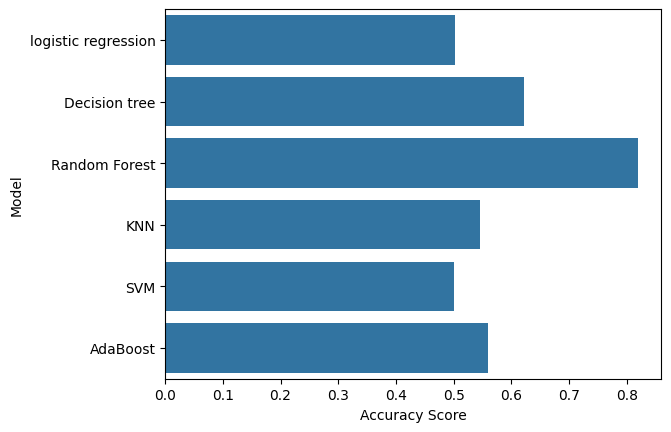

In [ ]:
sns.barplot(x="Accuracy Score",y="Model",data=model)

**HyperTuning Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2,10,30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(x_train,y_train)
print(grid_rf.best_params_)


{'min_samples_leaf': 2, 'n_estimators': 350}


In [ ]:
rf = RandomForestClassifier(n_estimators=350, min_samples_leaf=2)
#training of the model
rf.fit(x_train,y_train)
#making prediction
pred_orf=rf.predict(x_test)
#finding accuracy
accuracy_score_orf=accuracy_score(y_test,pred_orf)
accuracy_score_orf

0.8125

Building a predictive system


In [ ]:
input_data = (6.552847474374976,198.8069396513827,34006.42073313584,8.691206175159937,274.90435120291863,477.1639067796365,14.369630090209853,78.17306258634733,4.687986155246704)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Portable Water')
else:
  print('Not Portable Water')

[1]
Portable Water


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
